# INTERN NAME :------- MEHUL SAKLANI

# The Sparks Foundation - Data Science & Business Analytics Internship

# Task 06 : Prediction using Decision Tree Algorithm

####       The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing Libraries

In [1]:
# first we are going to import basic important libraries.

## This workshop deals with understanding the working of decision trees

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets #for import dataset from sklearn library
import warnings
warnings.filterwarnings(action='ignore') #for ignore warnings

Decision tree algorithms is the Supervised learning. The purpose of create the Decision tree classsifier is if we feed any new data in this classifier, it would be able to predict right class accordingly.The goal of using Decision tree is to create a  training model that can use to predict the classes and value of the target variable by simple learning rules. And this algorithms can perform both classification, regression and multioutput tasks. 
let's check ans start with the iris dataset.

In [2]:
#importing our iris datset
iris=datasets.load_iris() #loading the iris dataset

df= pd.DataFrame(iris.data, columns=iris.feature_names) # forming the iris dataset

df.head() # for display first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.tail() #for display last 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [4]:
new = iris.target
new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df['species']=iris['target']
df['species']=df['species'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape #shape of the dataset

(150, 5)

In [7]:
df.info() #over-all info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe() #statistical overview of data and described all the featuresb

# petalwidth minimum value is 0.1 and maximum is 2.5 similarly you can check other

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# preprocessing of the dataset so turn to check null values

df.isnull().sum() # for check the sum of all num values in each columns

#data is clean

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

#### Data visualization

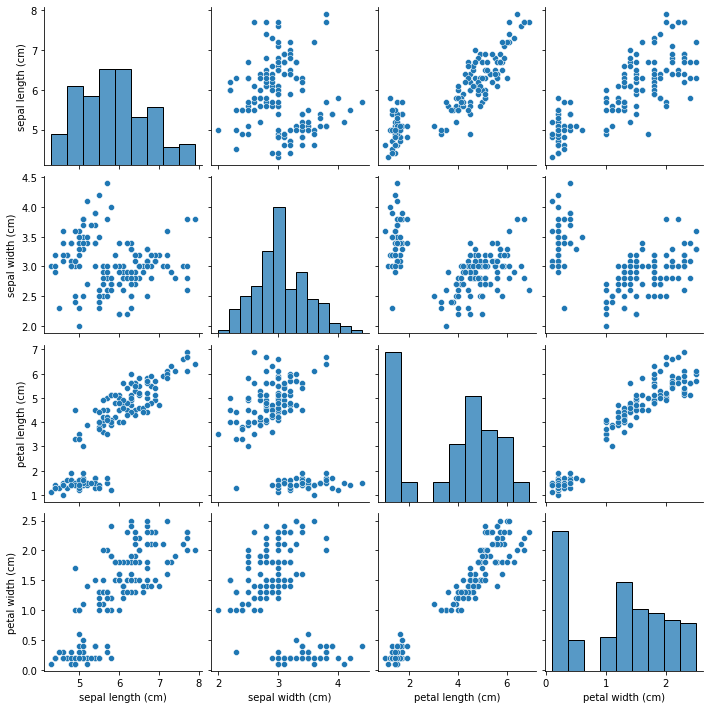

In [10]:
#Pairplot
sns.pairplot(df) #It's a pairplot to gain more insights of the datab

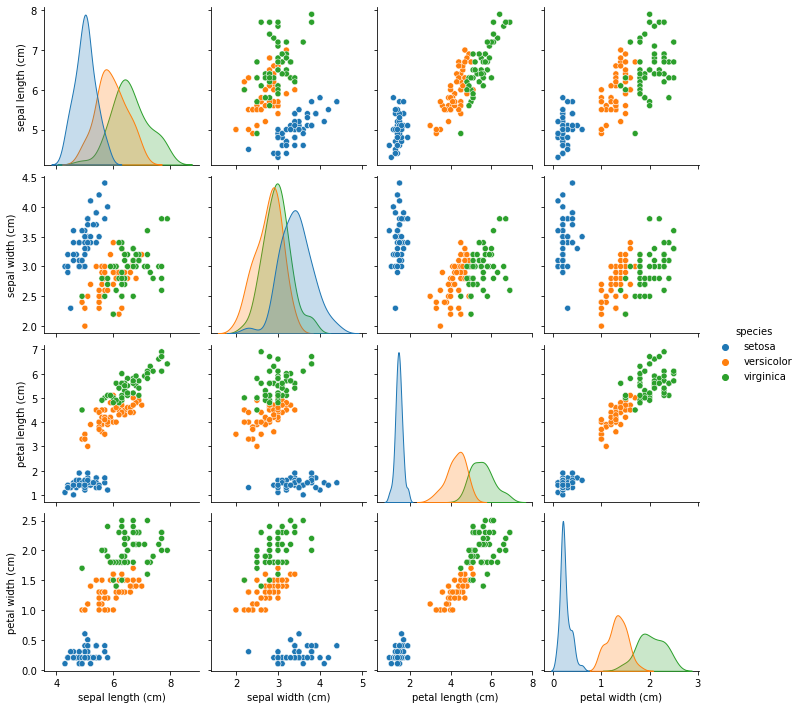

In [11]:
# now turn to compare with various features and relationship between columns

sns.pairplot(df, hue='species')


1. iris - setosa can easily be identified whereas the iris - versicolor & iris - virginics are overlapping.
2. Petal-length and Petal Width is important feature for identifying the flower

<AxesSubplot:>

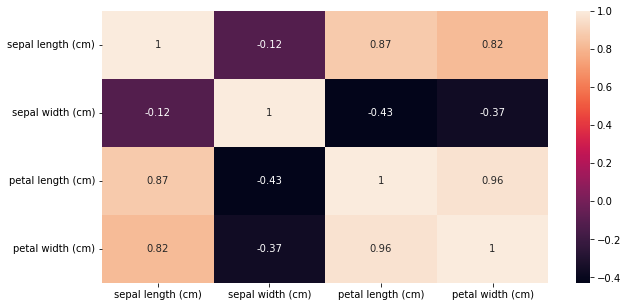

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True) 

Petal length and petal width having highest positive correaltion.

In [13]:
#preparation the data for training

# Ml is can not work with string values so we need to drop some columns. so we need to label encoding with 'y'

#x-y split 
x= df.iloc[:,:-1].values #feature matrix
y=df.iloc[:,-1].values #vector of predictions

In [14]:
from sklearn.preprocessing import LabelEncoder # import library for label encoding

In [15]:
y


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [16]:
lab = LabelEncoder()
y= lab.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#spliting into training and test set

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, train_size=0.8, random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape # shape of spliting set

((120, 4), (30, 4), (120,), (30,))

In [18]:
#training the model

from sklearn.tree import DecisionTreeClassifier as dt

classifier= dt(class_weight='balanced')
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)


In [19]:
y_pred #predicted value

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [20]:
y_test  #actual value

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [21]:
#compare with actual and predicted value

data = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
data.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2


In [22]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [23]:
#accuracy score

accuracy_score(y_test,y_pred)

0.9666666666666667

In [24]:
# Install required libraries
# !pip install pydotplus
#!pip install graphviz

Let's try to visualize the Decision Tree to understand it better

In [25]:
fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

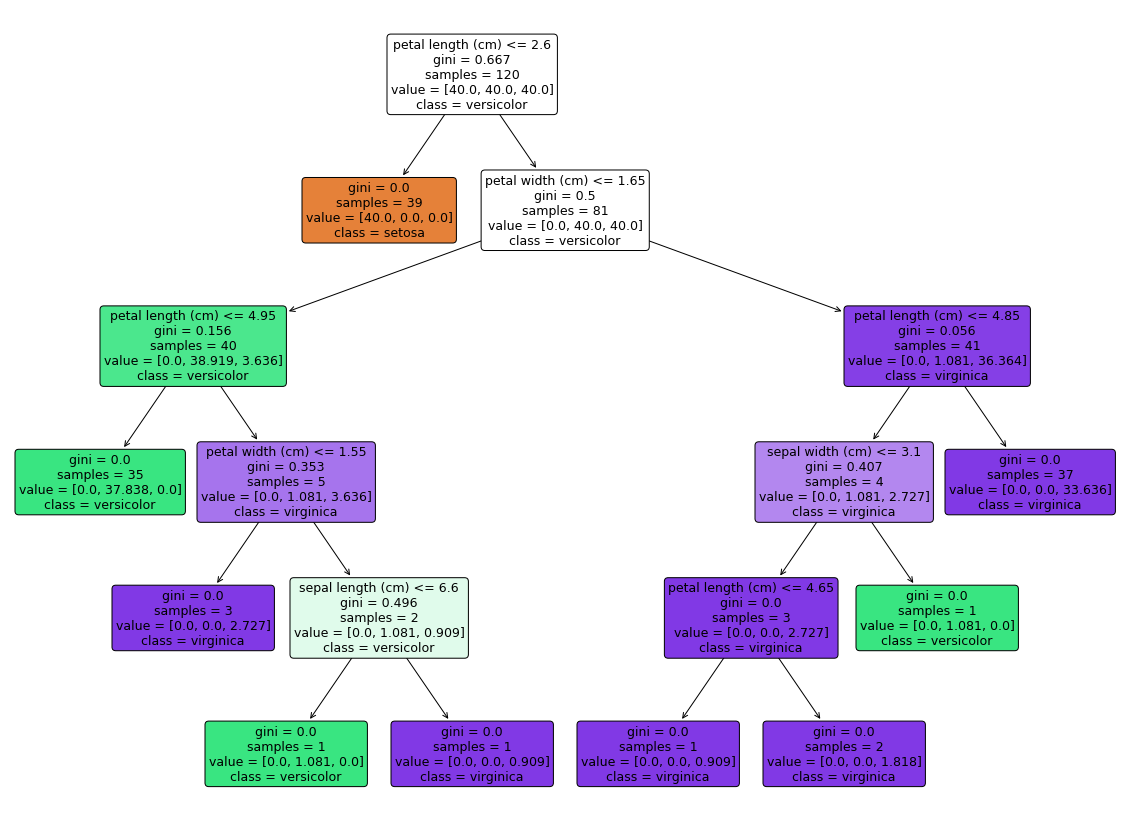

In [26]:
# Visualize the graph or decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(classifier, feature_names=fn, class_names=cn, filled=True, rounded=True)
plt.show()


In [27]:
print('Thank you, We have completed one more task.')

Thank you, We have completed one more task.
